In [21]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from matplotlib import pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.metrics import precision_score
import joblib
from sklearn import metrics
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#特征选择的包
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import chi2

#stacking的包
from functools import reduce
from heamy.dataset import Dataset
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold               #交叉
import re
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
import os
import warnings
warnings.filterwarnings('ignore')
from mlxtend.classifier import StackingCVClassifier

In [2]:
from imblearn.over_sampling import RandomOverSampler

def RandomOverSampler_sampling(train_x,train_y): #随机过采样
    ros = RandomOverSampler(random_state=0)

    sampling_train_x, sampling_train_y = ros.fit_resample(train_x, train_y)
    
    return sampling_train_x, sampling_train_y

from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

def smote_sampling(train_x,train_y): #smote采样
    #print(data)
    # X = data.loc[:, data.columns != 'RESP']
    # y = data.loc[:, data.columns == 'RESP']

    # train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
    overstamp = SMOTE(random_state=0)
    
    SMOTE_train_x, SMOTE_train_y = overstamp.fit_resample(train_x, train_y)
    # 统计数据的标签0，1个数
    # print(pd.value_counts(SMOTE_train_y, sort=True).sort_index())
    #print(SMOTE_train_x)
    #print(SMOTE_train_y)
    #print(SMOTE_train_y.value_counts())
    #print(test_y.value_counts())
    
    return SMOTE_train_x, SMOTE_train_y

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# result_x,result_y = smote_sampling(X_train, y_train)

# print(Counter(result_y))


#borderline-smote采样

# from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

def borderline_smote_sampling(train_x,train_y): 
    sm = BorderlineSMOTE(random_state=42,kind="borderline-1")
    SMOTE_train_x, SMOTE_train_y = sm.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(SMOTE_train_y))
    return SMOTE_train_x, SMOTE_train_y

#SVMSMOTE采样

# from collections import Counter
from imblearn.over_sampling import SVMSMOTE

def SVMSMOTE_sampling(train_x,train_y): 
    sm = SVMSMOTE(random_state=42)
    SMOTE_train_x, SMOTE_train_y = sm.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(SMOTE_train_y))
    return SMOTE_train_x, SMOTE_train_y

#KMeansSMOTE采样

from imblearn.over_sampling import KMeansSMOTE

def KMeansSMOTE_sampling(train_x,train_y): 
    sm = KMeansSMOTE(random_state=42, cluster_balance_threshold=0.1)
    SMOTE_train_x, SMOTE_train_y = sm.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(SMOTE_train_y))
    return SMOTE_train_x, SMOTE_train_y

#SMOTENC采样

from imblearn.over_sampling import SMOTENC

def SMOTENC_sampling(train_x,train_y): 
    sm = SMOTENC(categorical_features=[0, 2], random_state=0)
    SMOTE_train_x, SMOTE_train_y = sm.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(SMOTE_train_y))
    return SMOTE_train_x, SMOTE_train_y

# ADASYN自适应合成抽样

from imblearn.over_sampling import ADASYN

def ADASYN_sampling(train_x,train_y): 
    ada = ADASYN(random_state=42, sampling_strategy='minority')
    SMOTE_train_x, SMOTE_train_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(SMOTE_train_y))
    return SMOTE_train_x, SMOTE_train_y

# smote-variants库含有多种SMOTE方法

# ClusterCentroids采样

from imblearn.under_sampling import ClusterCentroids

def ClusterCentroids_sampling(train_x,train_y):
    ada = ClusterCentroids(random_state=42)
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# RandomUnderSampler采样

from imblearn.under_sampling import RandomUnderSampler

def RandomUnderSampler_sampling(train_x,train_y): 
    ada = RandomUnderSampler(random_state=42)
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# EditedNearestNeighbours采样

from imblearn.under_sampling import EditedNearestNeighbours

def EditedNearestNeighbours_sampling(train_x,train_y): 
    ada = EditedNearestNeighbours()
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# RepeatedEditedNearestNeighbours采样

from imblearn.under_sampling import RepeatedEditedNearestNeighbours

def RepeatedEditedNearestNeighbours_sampling(train_x,train_y): 
    ada = RepeatedEditedNearestNeighbours()
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# AllKNN采样

from imblearn.under_sampling import AllKNN

def AllKNN_sampling(train_x,train_y): 
    ada = AllKNN()
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# CondensedNearestNeighbour采样

from imblearn.under_sampling import CondensedNearestNeighbour

def CondensedNearestNeighbour_sampling(train_x,train_y): 
    ada = CondensedNearestNeighbour()
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# OneSidedSelection采样

from imblearn.under_sampling import OneSidedSelection

def OneSidedSelection_sampling(train_x,train_y): 
    ada = OneSidedSelection()
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# NeighbourhoodCleaningRule采样

from imblearn.under_sampling import NeighbourhoodCleaningRule

def NeighbourhoodCleaningRule_sampling(train_x,train_y): 
    ada = NeighbourhoodCleaningRule()
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# InstanceHardnessThreshold采样

from imblearn.under_sampling import InstanceHardnessThreshold

def InstanceHardnessThreshold_sampling(train_x,train_y): 
    ada = InstanceHardnessThreshold()
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# SMOTEENN采样

from imblearn.combine import SMOTEENN

def SMOTEENN_sampling(train_x,train_y): 
    ada = SMOTEENN(random_state=42)
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

# SMOTETomek采样

from imblearn.combine import SMOTETomek

def SMOTETomek_sampling(train_x,train_y): 
    ada = SMOTETomek(random_state=42)
    sampling_x, sampling_y = ada.fit_resample(train_x, train_y)
    print('Resampled dataset shape %s' % Counter(sampling_y))
    return sampling_x, sampling_y

In [3]:
def gridsearchcv(X, y, X_test, y_test, path):
    #需要自动调参的模型
    models = [
                KNeighborsClassifier(),
                
                # LinearDiscriminantAnalysis(),
                DecisionTreeClassifier(random_state=0, criterion="entropy"),
                RandomForestClassifier(random_state=2)
    ]

    #不需要自动调参的模型
    models2 =   [
                    LinearDiscriminantAnalysis(n_components=1),
                    LogisticRegression(penalty='l2', C=1.0, random_state=None, solver='lbfgs', max_iter=3000, multi_class='ovr', verbose=0),
                    GaussianNB(),
                    GradientBoostingClassifier(),
                    XGBClassifier(),
                    # MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[50, 50])
                    SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
                        max_iter=-1, random_state=None, shrinking=True,
                        tol=0.001, verbose=False, probability=True),         
                
                ]


    names = ['knn', 'tree', 'forest']
    names2 = ['LDA', 'LogisticRegression', 'GaussianNB', 'GradientBoosting', 'XGBClassifier', 'svc']
    para_dicts = [{"n_neighbors":range(2, 30)}, {"max_depth":range(2, 30)}, {"n_estimators":range(2, 31)}]
    models_acc = []
    models_precision = []
    models_recall = []
    models_f1 = []


    #需要自动调参的模型
    for i in range(len(models)):
        model = models[i]
        para_dict = para_dicts[i]
        grid_search = GridSearchCV(model, para_dict, cv=10)
        grid_search.fit(X, y)
        print(grid_search.best_params_, grid_search.best_score_)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        acc = metrics.accuracy_score(y_pred, y_test)
        precision = metrics.precision_score(y_pred, y_test)
        recall = metrics.recall_score(y_pred, y_test)
        f1 = metrics.f1_score(y_pred, y_test, average="macro")
        models_acc.append(acc)
        models_precision.append(precision)
        models_recall.append(recall)
        models_f1.append(f1)
        print("{}   {}  {}   {}  {}".format(names[i], acc, precision, recall, f1))
        pth = os.path.join(path, '{}.pkl'.format(names[i])).replace('\\', '/')
        print(pth)
        joblib.dump(best_model, pth)
        

    #不需要自动调参的模型
    for i in range(len(models2)):
        model = models2[i]
        grid_search = GridSearchCV(model, param_grid={}, cv=10)
        grid_search.fit(X, y)
        print(grid_search.best_params_, grid_search.best_score_)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        acc = metrics.accuracy_score(y_pred, y_test)
        precision = metrics.precision_score(y_pred, y_test)
        recall = metrics.recall_score(y_pred, y_test)
        f1 = metrics.f1_score(y_pred, y_test, average="macro")
        models_acc.append(acc)
        models_precision.append(precision)
        models_recall.append(recall)
        models_f1.append(f1)
        print("{}   {}  {}  {}  {}".format(names2[i], acc, precision, recall, f1))
        pth = os.path.join(path, '{}.pkl'.format(names2[i]))
        joblib.dump(best_model, pth)

In [4]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.shape

(41188, 21)

In [7]:
#先查看是否有null值的数据
data.isnull().sum()     #结果显示没有null值

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#判断数据是否是不平衡数据集     Pos Num = 4640   Neg Num = 36548
pos_count = 0
for i in range(data.shape[0]):
    if data.y[i] == 'yes':
        pos_count += 1
print("Pos Num = {}   Neg Num = {}".format(pos_count, data.shape[0]-pos_count))

Pos Num = 4640   Neg Num = 36548


In [9]:
data.info()     #10个object，这些都是需需要做数值映射
# job marital education default housing loan contact month poutcome y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['job']       = labelencoder_X.fit_transform(data['job']) 
data['marital']   = labelencoder_X.fit_transform(data['marital']) 
data['education'] = labelencoder_X.fit_transform(data['education']) 
data['default']   = labelencoder_X.fit_transform(data['default']) 
data['housing']   = labelencoder_X.fit_transform(data['housing']) 
data['loan']      = labelencoder_X.fit_transform(data['loan']) 
data['contact']   = labelencoder_X.fit_transform(data['contact']) 
data['month']     = labelencoder_X.fit_transform(data['month']) 
data['day_of_week']       = labelencoder_X.fit_transform(data['day_of_week'])
data['poutcome']  = labelencoder_X.fit_transform(data['poutcome'])
data['y'].replace(['yes', 'no'], [1,0], inplace  = True)

In [ ]:
#数据分割并保存，只运行一次

###basemodel_save_dir自行设置
y = np.array(data.y)
data.drop("y", axis=1, inplace=True)      #删除不需要的列
X = np.array(data)
print("训练和原始测试数据的大小：{}".format(X.shape))


indices = np.arange(X.shape[0])
x_train,x_test,y_train,y_test, indices_train, indices_test = train_test_split(X,y,indices, test_size = 0.2)

#将训练数据索引和测试数据索引写入txt文件    只运行一次
train_file_path = os.path.join(basemodel_save_dir, 'train.txt').replace('\\', '/')
print(train_file_path)
train_file = open(train_file_path, 'w', encoding='gbk')
for indexs in indices_train:
    train_file.write(str(indexs))
    train_file.write('\n')
train_file.close()

test_file_path = os.path.join(basemodel_save_dir, 'test.txt').replace('\\', '/')
print(test_file_path)
test_file = open(test_file_path, 'w', encoding='gbk')
for indexs in indices_test:
    test_file.write(str(indexs))
    test_file.write('\n')
test_file.close()


In [12]:
basemodel_save_dir ='C:/Users/Administrator/Desktop/大创/kaggle bank data'
train_file_path = os.path.join((basemodel_save_dir), 'train.txt').replace('\\', '/')
test_file_path  = os.path.join(basemodel_save_dir,  'test.txt').replace('\\', '/')
train_file = open(train_file_path, 'r', encoding='gbk')
test_file  = open(test_file_path,  'r', encoding='gbk')
train_indices = train_file.readlines()
test_indices  = test_file.readlines()
train_indices = [eval(item.strip()) for item in train_indices]  #处理读进来的char
test_indices =  [eval(item.strip()) for item in  test_indices]
train_file.close()
test_file.close()
#开始按照索引分割data
train_set = data.iloc[train_indices, :]
test_set  = data.iloc[test_indices,  :]

In [13]:
y_train = np.array(train_set.y)
train_set.drop("y", axis=1, inplace=True)      #删除不需要的列
x_train = np.array(train_set)

y_test = np.array(test_set.y)
test_set.drop("y", axis=1, inplace=True)      #删除不需要的列
x_test = np.array(test_set)

In [14]:
std = StandardScaler()
std.fit(x_train)
x_train = std.transform(x_train)
x_test  = std.transform(x_test)

In [15]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
ypred = tree.predict(x_test)
print('DT Reports\n',classification_report(y_test, ypred))

DT Reports
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7291
           1       0.53      0.54      0.54       947

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.89      0.89      0.89      8238



In [ ]:
gridsearchcv(x_train, y_train, x_test, y_test, basemodel_save_dir)    # gridsearchcv(X, y, X_test, y_test, path)    #耗时32min

In [20]:
names1 = ['knn', 'tree', 'forest']
names2 = ['LDA', 'LogisticRegression', 'GaussianNB', 'stacking', 'XGBClassifier', 'svc']
names = names1 + names2
base_result_path = os.path.join(basemodel_save_dir, 'report_to_file.xls').replace('\\', '/')
print(base_result_path)
df = pd.DataFrame()
for name in names:
    model_path = os.path.join(basemodel_save_dir, '{}.pkl'.format(name)).replace('\\', '/')
    print(model_path)
    model = joblib.load(model_path)
    print(model)
    pred = model.predict(x_test)
    report = metrics.classification_report(y_test, pred, output_dict=True)  
    report = pd.DataFrame(report).transpose()
    df = pd.concat([df, report], axis=0)
    
# df.to_excel(base_result_path, sheet_name='Sheet1')

C:/Users/Administrator/Desktop/结果/bank/report_to_file.xls
C:/Users/Administrator/Desktop/结果/bank/knn.pkl
KNeighborsClassifier(n_neighbors=11)
C:/Users/Administrator/Desktop/结果/bank/tree.pkl
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
C:/Users/Administrator/Desktop/结果/bank/forest.pkl
RandomForestClassifier(n_estimators=26, random_state=2)
C:/Users/Administrator/Desktop/结果/bank/LDA.pkl
LinearDiscriminantAnalysis(n_components=1)
C:/Users/Administrator/Desktop/结果/bank/LogisticRegression.pkl
LogisticRegression(max_iter=3000, multi_class='ovr')
C:/Users/Administrator/Desktop/结果/bank/GaussianNB.pkl
GaussianNB()
C:/Users/Administrator/Desktop/结果/bank/stacking.pkl
StackingCVClassifier(classifiers=(XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
              

In [29]:
knn = KNeighborsClassifier(n_neighbors=11)
dt  = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
forest = RandomForestClassifier(n_estimators=26, random_state=2)
lda = LinearDiscriminantAnalysis(n_components=1)
lr = LogisticRegression(max_iter=3000, multi_class='ovr')
nb = GaussianNB()
xgb = XGBClassifier()
ada = AdaBoostClassifier(n_estimators=100)
svc = SVC(C=1, gamma='auto', kernel='linear', probability=True)
stack1 = StackingCVClassifier(
    classifiers=(xgb, tree, RandomForestClassifier(), ada),
    meta_classifier=XGBClassifier(n_estimators=44),
    use_features_in_secondary=True,
    store_train_meta_features=True,
    shuffle=True,
    random_state=0
    )
stack2 = StackingCVClassifier(
    classifiers=(xgb, tree, RandomForestClassifier(), ada),
    meta_classifier=LogisticRegression(),
    use_features_in_secondary=True,
    store_train_meta_features=True,
    shuffle=True,
    random_state=0
    )
stack3 = StackingCVClassifier(
    classifiers=(xgb, tree, RandomForestClassifier(), ada),
    meta_classifier=RandomForestClassifier(),
    use_features_in_secondary=True,
    store_train_meta_features=True,
    shuffle=True,
    random_state=0
    )

import time

models = [knn, dt, forest, lda, lr, nb, xgb, svc, stack1, stack2, stack3]
times  = []

for model in models:
    time_begin = time.time()
    
    model.fit(x_train, y_train)
    
    time_end = time.time()
    print(time_end-time_begin)
    times.append(time_end - time_begin)


0.005982875823974609
0.08078479766845703
0.8899214267730713
0.12367653846740723
0.13664937019348145
0.021940946578979492
[13:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.4379887580871582
133.1248743534088
[13:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

In [30]:
times

[0.005982875823974609,
 0.08078479766845703,
 0.8899214267730713,
 0.12367653846740723,
 0.13664937019348145,
 0.021940946578979492,
 1.4379887580871582,
 133.1248743534088,
 14.990938425064087,
 14.483376502990723,
 16.42133069038391]

C:/Users/Administrator/Desktop/结果/bank/report_to_file.xls
C:/Users/Administrator/Desktop/结果/bank/knn.pkl
KNeighborsClassifier(n_neighbors=11)
0.8924275882505185
C:/Users/Administrator/Desktop/结果/bank/tree.pkl
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
0.9338781361986406
C:/Users/Administrator/Desktop/结果/bank/forest.pkl
RandomForestClassifier(n_estimators=26, random_state=2)
0.9380788280006146
C:/Users/Administrator/Desktop/结果/bank/LDA.pkl
LinearDiscriminantAnalysis(n_components=1)
0.9277196850726698
C:/Users/Administrator/Desktop/结果/bank/LogisticRegression.pkl
LogisticRegression(max_iter=3000, multi_class='ovr')
0.9285898325125492
C:/Users/Administrator/Desktop/结果/bank/GaussianNB.pkl
GaussianNB()
0.8505047448960307
C:/Users/Administrator/Desktop/结果/bank/stacking.pkl
StackingCVClassifier(classifiers=(XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                          

<Figure size 1600x1200 with 0 Axes>

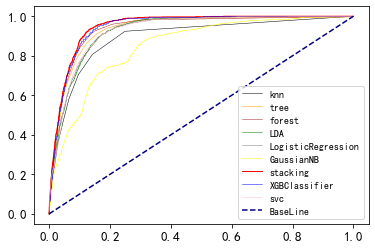

In [19]:
#查看aoc
basemodel_save_dir = 'C:/Users/Administrator/Desktop/结果/bank'
names1 = ['knn', 'tree', 'forest']
names2 = ['LDA', 'LogisticRegression', 'GaussianNB', 'stacking', 'XGBClassifier', 'svc']
colors = ['black', 'orange', 'brown', 'green', 'grey', 'yellow', 'red', 'blue', 'pink']
names = names1 + names2
base_result_path = os.path.join(basemodel_save_dir, 'report_to_file.xls').replace('\\', '/')
print(base_result_path)
plt.figure(figsize=(8,6), dpi=200)
plt.figure()
plt.rc('font', family='SimHei', size=13)
for i, name in enumerate(names):
    model_path = os.path.join(basemodel_save_dir, '{}.pkl'.format(name)).replace('\\', '/')
    print(model_path)
    model = joblib.load(model_path)
    print(model)
    pred = model.predict_proba(x_test)[:, 1]
    fpr,tpr,threshold = metrics.roc_curve(y_test, pred) ###计算真正率和假正率
    roc_auc = metrics.auc(fpr,tpr) ###计算auc的值
    print(roc_auc)
    if colors[i] == 'red':
        plt.plot(fpr, tpr, 'b', label=name, color=colors[i], linewidth=1.0) ###假正率为横坐标，真正率为纵坐标做曲线
    else:
        plt.plot(fpr, tpr, 'b', label=name, color=colors[i], linewidth=0.5)
plt.plot([0, 1], [0, 1], color='navy', label='BaseLine', linestyle='--')   #baseline
plt.rcParams.update({'font.size': 10})
plt.legend()
plt.show()  

In [24]:

lr = LogisticRegression()
xgb = XGBClassifier(n_estimators=44)
lda = LinearDiscriminantAnalysis()
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
gbk = GradientBoostingClassifier(n_estimators=38)
ada = AdaBoostClassifier(n_estimators=100)
stack = StackingCVClassifier(
    classifiers=(xgb, ada, forest, tree),
    meta_classifier=forest,
    use_features_in_secondary=True,
    store_train_meta_features=True,
    shuffle=True,
    random_state=0
    )
stack.fit(x_train, y_train)
y_pred = stack.predict(x_test)
joblib.dump(stack, 'C:/Users/Administrator/Desktop/大创/kaggle bank data/stack7.pkl')

report = metrics.classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_excel('C:/Users/Administrator/Desktop/大创/kaggle bank data/stacking7结果(不调参).xlsx', sheet_name='Sheet1')
print('stacking Reports\n',report)

[12:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
stacking Reports
               precision    recall  f1-score    suppo

In [18]:
model = joblib.load(r'C:\Users\Administrator\Desktop\大创\kaggle bank data\stack6.pkl')
y_pred = model.predict(x_test)
report =  metrics.classification_report(y_pred=y_pred, y_true=y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7291
           1       0.66      0.56      0.60       947

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



In [27]:
#查看auc
model = joblib.load('C:/Users/Administrator/Desktop/大创/kaggle bank data/stack7.pkl')
print(model.classifiers)        #第一层模型
print(model.meta_classifier)    #第二层模型
# pred = model.predict_proba(x_test)[:, 1]
# fpr,tpr,threshold = metrics.roc_curve(y_test, pred) ###计算真正率和假正率
# roc_auc = metrics.auc(fpr,tpr) ###计算auc的值
# print(roc_auc)

StackingCVClassifier(classifiers=(XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                enable_categorical=False,
                                                gamma=None, gpu_id=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_delta_step=None,
                                                max_depth=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints...
       

In [ ]:
#对stacking调参
grid = GridSearchCV(
        estimator=stack,
        param_grid={
            # "logisticregression__solver": ['liblinear','lbfgs', 'sag','newton-cg', 'saga'],
            # "lineardiscriminantanalysis__n_topics": range(20, 35, 5),
            "randomforestclassifier__n_estimators":range(10, 31),
            "decisiontreeclassifier__max_depth":range(10, 21),
            # "gradientboostingclassifier__n_estimators":range(2, 30)
            # "meta_classifier__n_estimators":range(20, 100, 20)
            },
    cv=5,
    refit=True,
    verbose=10
)
#Fitting 5 folds for each of 231 candidates, totalling 1155 fits   6s一个fit 

grid.fit(x_train, y_train)
stack_best = grid.best_params_
y_pred = stack_best.predict(x_test)
print('stacking Reports\n',classification_report(y_test, y_pred))
joblib.jump(stack_best,'C:/Users/Administrator/Desktop/大创/kaggle data2/result/stacking/stack_best.pkl')

In [ ]:
#单模型采样
under_sampling_func_set = [
                    ClusterCentroids_sampling, RandomUnderSampler_sampling,
                    EditedNearestNeighbours_sampling, RepeatedEditedNearestNeighbours_sampling,
                    AllKNN_sampling,
                     OneSidedSelection_sampling, NeighbourhoodCleaningRule_sampling,
                     InstanceHardnessThreshold_sampling
                    ] #remove CondensedNearestNeighbour_sampling
under_names = ['ClusterCentroids_sampling', 'RandomUnderSampler_sampling',
                    'EditedNearestNeighbours_sampling', 'RepeatedEditedNearestNeighbours_sampling',
                    'AllKNN_sampling',
                     'OneSidedSelection_sampling', 'NeighbourhoodCleaningRule_sampling',
                     'InstanceHardnessThreshold_sampling']             
                   

combine_sampling_func_set = [SMOTEENN_sampling, SMOTETomek_sampling]
# over_sampling_func_set = [RandomOverSampler_sampling, smote_sampling, 
#                      borderline_smote_sampling, SVMSMOTE_sampling,
#                     KMeansSMOTE_sampling, SMOTENC_sampling, ADASYN_sampling] 
over_sampling_func_set = [RandomOverSampler_sampling, smote_sampling, 
                     borderline_smote_sampling, SVMSMOTE_sampling,
                      SMOTENC_sampling]

sampling_func_set = under_sampling_func_set + combine_sampling_func_set + over_sampling_func_set


# classified_model_set = [logistic_regress, GaussianNB_regress, KNN_regress,
#                        MLP_regress, LDA_regress, SVM, XGboost, DecisionTree, forest]
# Kflod_base(X, y, X_test, y_test, 10, classified_model_set, sampling_func_set)

result_sampling_acc = []
result_sampling_precision = []
result_sampling_recall = []
result_sampling_f1 = []

sampling_X_train_shape = []
sampling_y_train_shape = []
model_dir = 'C:/Users/Administrator/Desktop/大创/kaggle data2/result/单模型加采样/欠采样'
i = 0
for samplingfunc in under_sampling_func_set:
    print("-------------{}----------------".format(samplingfunc))
    sampling_X_train,sampling_y_train = samplingfunc(x_train, y_train)
    sampling_X_train_shape.append(sampling_X_train.shape)
    sampling_y_train_shape.append(sampling_y_train.shape)
    print("--------------SHAPE-------------")
    print("X_train:{}   y_train:{}".format(sampling_X_train.shape, sampling_y_train.shape))

    models_acc, models_precision, models_recall, models_f1 = gridsearchcv(sampling_X_train, sampling_y_train, x_test, y_test, model_dir)
    result_sampling_acc.append(models_acc)
    result_sampling_precision.append(models_precision)
    result_sampling_recall.append(models_recall)
    result_sampling_f1.append(models_f1)

    #保存结果
    names1 = ['knn', 'tree', 'forest', 'XGBClassifier']
    names2 = ['LDA', 'LogisticRegression', 'GaussianNB', 'GradientBoosting']
    names = names1 + names2
    base_result_path = os.path.join(model_dir, '{}_report.xls'.format(under_names[i])).replace('\\', '/')
    print(base_result_path)
    df = pd.DataFrame()
    for name in names:
        model_path = os.path.join(model_dir, '{}.pkl'.format(name)).replace('\\', '/')
        print(model_path)
        model = joblib.load(model_path)
        print(model)
        pred = model.predict(x_test)
        report = metrics.classification_report(y_test, pred, output_dict=True)
        report = pd.DataFrame(report).transpose()
        df = pd.concat([df, report], axis=0)
        df.to_excel(base_result_path, sheet_name='Sheet1')
    i += 1
    